In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()

df_confirmed = pd.read_csv(
    '../../corona/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv',
                sep=',',encoding='ISO8859-1')

df_deceased = pd.read_csv(
    '../../corona/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv',
                sep=',',encoding='ISO8859-1')


In [36]:
df_confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,43,43,47,48,50,50,50,53,59,70
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,...,293,331,360,420,461,502,511,581,639,639
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,110,110,117,130,138,150,150,160,178,178
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,...,36,50,50,83,93,99,117,129,149,149


In [37]:
us = df_confirmed.groupby('Country/Region').get_group('US')
us_states = us[['Province/State','3/10/20']].groupby('Province/State').sum()
us_states.reset_index(inplace=True)
comp = us_states['Province/State'].str.strip().str.split(',')
city_states = pd.DataFrame(comp.values.tolist(),columns=['city','state'])
us_states = pd.concat([us_states,city_states],axis=1)


In [38]:
countries = df_confirmed['Country/Region'].unique()
sorted(countries)

['Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahrain',
 'Bangladesh',
 'Belarus',
 'Belgium',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Chile',
 'China',
 'Colombia',
 'Congo (Kinshasa)',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cruise Ship',
 'Cuba',
 'Cyprus',
 'Czechia',
 'Denmark',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'Estonia',
 'Finland',
 'France',
 'French Guiana',
 'Georgia',
 'Germany',
 'Greece',
 'Guyana',
 'Holy See',
 'Honduras',
 'Hungary',
 'Iceland',
 'India',
 'Indonesia',
 'Iran',
 'Iraq',
 'Ireland',
 'Israel',
 'Italy',
 'Jamaica',
 'Japan',
 'Jordan',
 'Korea, South',
 'Kuwait',
 'Latvia',
 'Lebanon',
 'Liechtenstein',
 'Lithuania',
 'Luxembourg',
 'Malaysia',
 'Maldives',
 'Malta',
 'Martinique',
 'Mexico',
 'Moldova',
 'Monaco',
 'Mongolia',
 'Morocco',
 'Nepal',
 'Netherland

In [39]:




all_countries = pd.DataFrame()

for c in countries:
    temp = df_confirmed[df_confirmed['Country/Region'] == c]
    temp = temp.groupby('Country/Region')
    temp = temp.sum().iloc[:,4:]
    temp = temp.T

    all_countries = pd.concat([all_countries,temp],axis=1)

def create_country_df(country):
    
    confirmed = all_countries[country]
    confirmed.index = pd.to_datetime(confirmed.index)
    factor = confirmed / confirmed.shift()
    data = pd.concat([confirmed,factor],axis=1)
    data.columns = ['confirmed','factor']
    data.factor.replace(np.inf,np.nan,inplace=True)
    data['inc'] = data['confirmed'] - data['confirmed'].shift()
    return data

confirmed_dict = dict()

for c in countries:
    confirmed_dict[c] = create_country_df(c)
    
thai = confirmed_dict['Thailand']
swe = confirmed_dict['Sweden']
ita = confirmed_dict['Italy']
korea = confirmed_dict['Korea, South']
us = confirmed_dict['US']
spain = confirmed_dict['Spain']
ita


,confirmed,factor,inc
2020-01-24,0,NaN,NaN
2020-01-25,0,NaN,0.0
2020-01-26,0,NaN,0.0
2020-01-27,0,NaN,0.0
2020-01-28,0,NaN,0.0
2020-01-29,0,NaN,0.0
2020-01-30,0,NaN,0.0
2020-01-31,2,NaN,2.0
2020-02-01,2,1.000000,0.0
2020-02-02,2,1.000000,0.0


In [40]:
global_confirmed = df_confirmed.iloc[:,5:].sum()
global_confirmed

1/23/20       653
1/24/20       941
1/25/20      1434
1/26/20      2118
1/27/20      2927
1/28/20      5578
1/29/20      6166
1/30/20      8234
1/31/20      9927
2/1/20      12038
2/2/20      16787
2/3/20      19881
2/4/20      23892
2/5/20      27635
2/6/20      30817
2/7/20      34391
2/8/20      37120
2/9/20      40150
2/10/20     42762
2/11/20     44802
2/12/20     45221
2/13/20     60368
2/14/20     66885
2/15/20     69030
2/16/20     71224
2/17/20     73258
2/18/20     75136
2/19/20     75639
2/20/20     76197
2/21/20     76823
2/22/20     78579
2/23/20     78965
2/24/20     79568
2/25/20     80413
2/26/20     81395
2/27/20     82754
2/28/20     84120
2/29/20     86011
3/1/20      88369
3/2/20      90306
3/3/20      92840
3/4/20      95120
3/5/20      97882
3/6/20     101784
3/7/20     105821
3/8/20     109795
3/9/20     113561
3/10/20    118592
3/11/20    125865
3/12/20    128343
dtype: int64

In [41]:
global_deceased = df_deceased.iloc[:,5:].sum()
global_deceased.index = pd.to_datetime(global_deceased.index)
global_confirmed = df_confirmed.iloc[:,5:].sum()
global_confirmed.index = pd.to_datetime(global_confirmed.index)

global_data = pd.DataFrame(global_confirmed,columns=['confirmed'])
global_data['factor'] = global_data['confirmed'] / global_data['confirmed'].shift()
global_data['inc'] = global_data['confirmed'] - global_data['confirmed'].shift()
global_data['dead'] = global_deceased
global_data['dead_factor'] = global_data['dead'] / global_data['dead'].shift()
global_data['dead_inc'] = global_data['dead'] - global_data['dead'].shift()
global_data['pct_dead'] = 100 * global_data['dead'] /global_data['confirmed']
global_data.index = pd.to_datetime(global_data.index)
global_data

,confirmed,factor,inc,dead,dead_factor,dead_inc,pct_dead
2020-01-23,653,NaN,NaN,18,NaN,NaN,2.756508
2020-01-24,941,1.441041,288.0,26,1.444444,8.0,2.763018
2020-01-25,1434,1.523911,493.0,42,1.615385,16.0,2.928870
2020-01-26,2118,1.476987,684.0,56,1.333333,14.0,2.644004
2020-01-27,2927,1.381964,809.0,82,1.464286,26.0,2.801503
2020-01-28,5578,1.905706,2651.0,131,1.597561,49.0,2.348512
2020-01-29,6166,1.105414,588.0,133,1.015267,2.0,2.156990
2020-01-30,8234,1.335388,2068.0,171,1.285714,38.0,2.076755
2020-01-31,9927,1.205611,1693.0,213,1.245614,42.0,2.145663
2020-02-01,12038,1.212652,2111.0,259,1.215962,46.0,2.151520


/usr/lib/python3.6/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


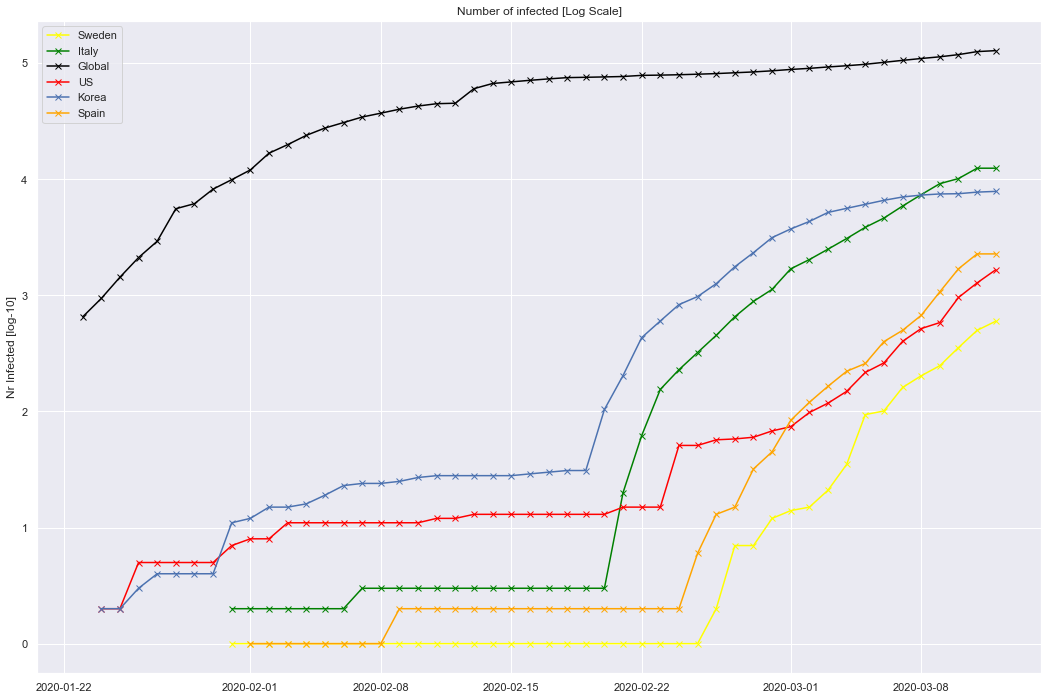

In [42]:
global_conf = np.log10(global_confirmed)

swe_conf = swe.loc[swe['confirmed'] > 0]
swe_conf = np.log10(swe_conf['confirmed'])
ita_conf = ita.loc[ita['confirmed'] > 0]
ita_conf = np.log10(ita_conf['confirmed'])
us_conf = us.loc[us['confirmed'] > 0]
us_conf = np.log10(us_conf['confirmed'])
korea_conf = korea.loc[korea['confirmed'] > 0]
korea_conf = np.log10(korea_conf['confirmed'])
spain_conf = spain.loc[spain['confirmed'] > 0]
spain_conf = np.log10(spain['confirmed'])

plt.figure(figsize=(18,12))
plt.title('Number of infected [Log Scale]')
plt.plot(swe_conf,'x-',color='yellow',label='Sweden')
plt.plot(ita_conf,'x-',color='green',label='Italy')
plt.plot(global_conf,'x-',color='black',label='Global')
plt.plot(us_conf,'x-',color='red',label='US')
plt.plot(korea_conf,'x-',color='b',label='Korea')
plt.plot(spain_conf,'x-',color='orange',label='Spain')
plt.ylabel('Nr Infected [log-10]')
plt.legend(loc='upper left')
plt.savefig('corona_evolution_countries_log.jpg',format='jpg')

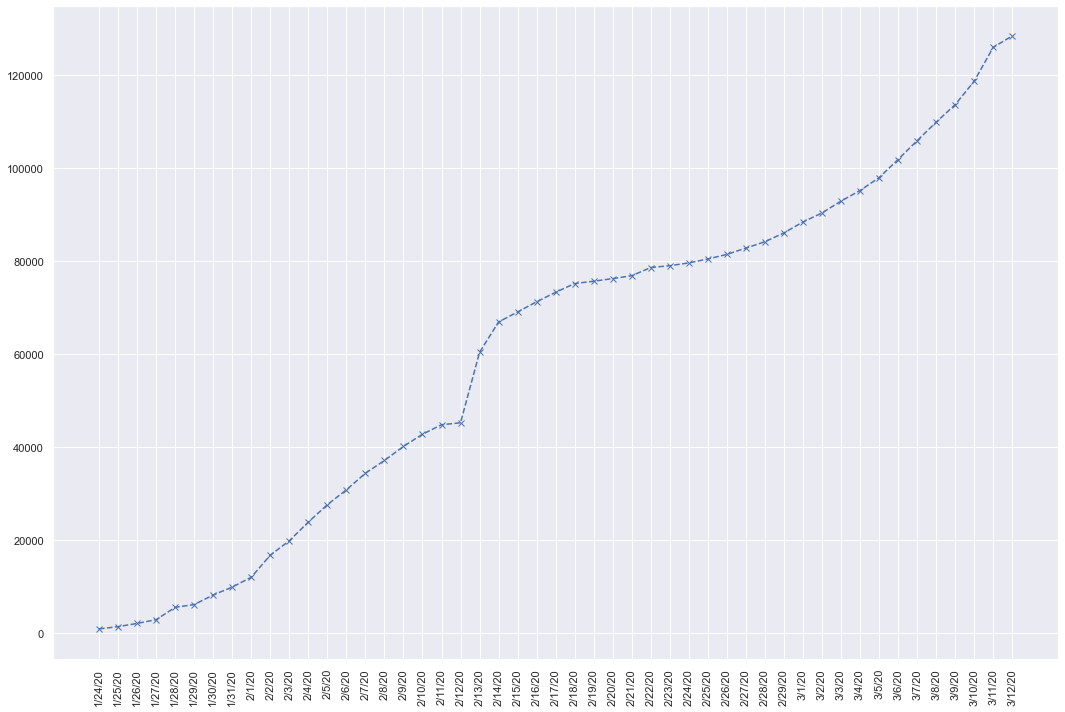

In [43]:
global_series = all_countries.sum(axis=1)
_= plt.figure(figsize=(18,12))
_= plt.plot(global_series,'x--')
_= plt.xticks(rotation=90)



In [44]:
df_deceased = pd.read_csv(
    '../../corona/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv',
                sep=',',encoding='ISO8859-1')
df_deceased.head()

#countries_deceased = df_deceased['Country/Region'].unique()

countries_deceased = countries
all_countries_deceased = pd.DataFrame()

for c in countries_deceased:
    temp = df_deceased[df_deceased['Country/Region'] == c]
    temp = temp.groupby('Country/Region')
    temp = temp.sum().iloc[:,4:]
    temp = temp.T

    all_countries_deceased = pd.concat([all_countries_deceased,temp],axis=1)

def create_deceased_df(country):
    
    deceased = all_countries_deceased[country]
    deceased.index = pd.to_datetime(deceased.index)
    factor = deceased / deceased.shift()

    data = pd.concat([deceased,factor],axis=1)
    data.columns = ['deceased','dead_factor']
    data.dead_factor.replace(np.inf,np.nan,inplace=True)
    data['dead_inc'] = data['deceased'] - data['deceased'].shift()
    return data

deceased_dict = dict()

for c in countries_deceased:
    deceased_dict[c] = create_deceased_df(c)




In [45]:
country_data = dict()

for c in countries:
    country_data[c] = pd.concat([confirmed_dict[c],deceased_dict[c]],axis=1)
    country_data[c]['pct_dead'] = 100 * country_data[c]['deceased'] / country_data[c]['confirmed']
    
ita = country_data['Italy']
swe = country_data['Sweden']
esp = country_data['Spain']
#iran = country_data['Iran']
esp


,confirmed,factor,inc,deceased,dead_factor,dead_inc,pct_dead
2020-01-24,0,NaN,NaN,0,NaN,NaN,NaN
2020-01-25,0,NaN,0.0,0,NaN,0.0,NaN
2020-01-26,0,NaN,0.0,0,NaN,0.0,NaN
2020-01-27,0,NaN,0.0,0,NaN,0.0,NaN
2020-01-28,0,NaN,0.0,0,NaN,0.0,NaN
2020-01-29,0,NaN,0.0,0,NaN,0.0,NaN
2020-01-30,0,NaN,0.0,0,NaN,0.0,NaN
2020-01-31,0,NaN,0.0,0,NaN,0.0,NaN
2020-02-01,1,NaN,1.0,0,NaN,0.0,0.000000
2020-02-02,1,1.000000,0.0,0,NaN,0.0,0.000000


(array([737456., 737463., 737470., 737477., 737485., 737492.]),
 <a list of 6 Text major ticklabel objects>)

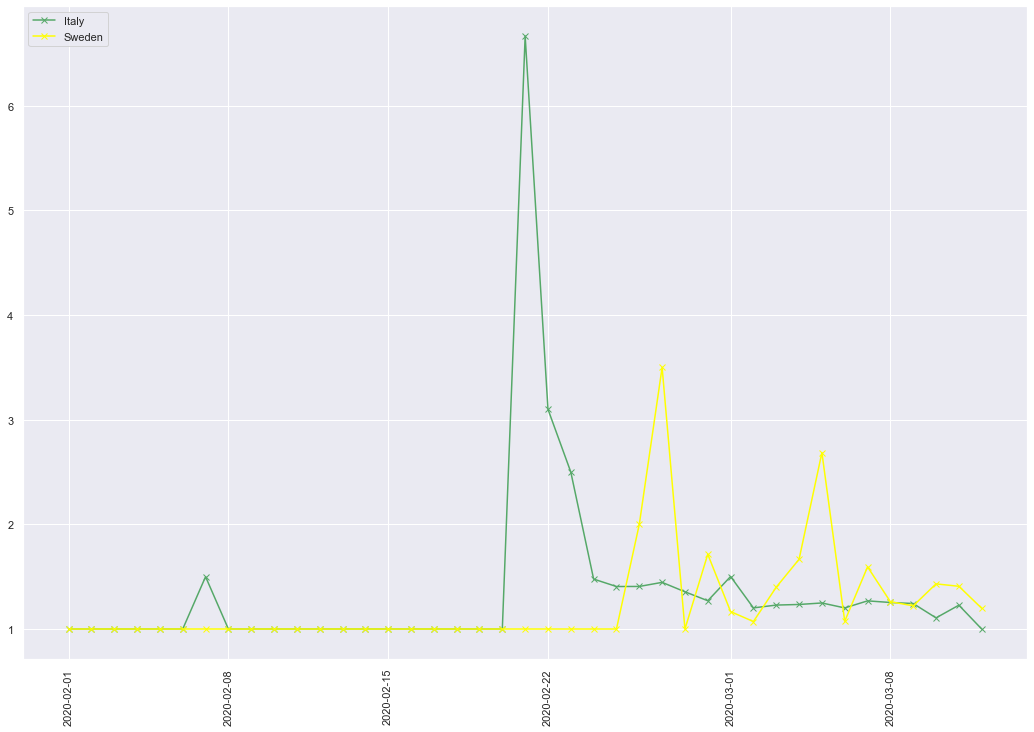

In [46]:
plt.figure(figsize=(18,12))
plt.plot(ita['factor'],'x-',label='Italy',color='g')
plt.plot(swe['factor'],'x-',label='Sweden',color='yellow')
plt.legend(loc='upper left')
plt.xticks(rotation=90)